## Aprendizado não supervisionado
### Aplicação do algorithm KMeans para clusterização de dados

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

<Axes: xlabel='battery_power', ylabel='ram'>

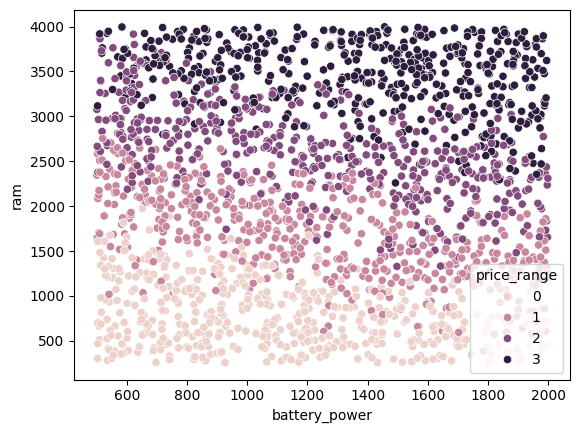

In [41]:
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)

In [42]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [43]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)


In [44]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.show()

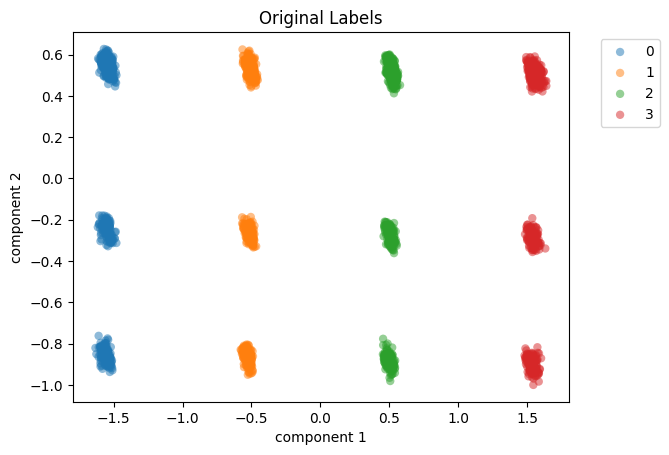

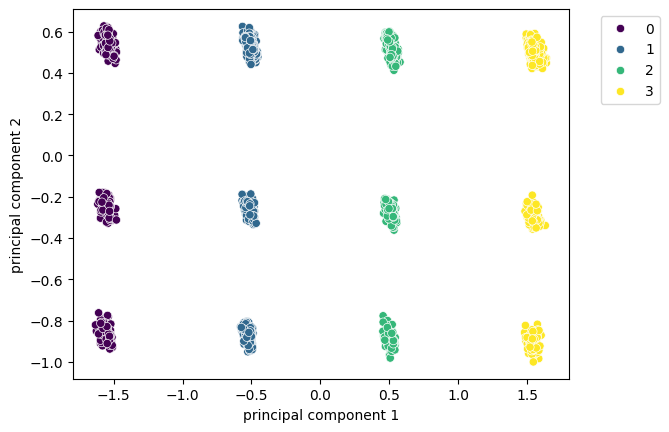

In [45]:
# PCA implementation
# Assuming 'x' is your feature set and 'df' is your original DataFrame
# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns=features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis=1)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_minmax)

plot_samples(principalComponents, y, 'Original Labels')

# Create a DataFrame with the principal components
principal_breast_Df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add the target variable to the principal component DataFrame
principal_breast_Df[target] = df[target].values

# Plot the scatter plot
sns.scatterplot(x='principal component 1', y='principal component 2', hue=target, data=principal_breast_Df, palette='viridis')

# Ajustar a posição da legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [46]:
# k_clusters = range(0, 3)
k_clusters = 12
# k-centroids
kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=1).fit(normalized_minmax)

#calculate the similarity between the centroids and the problems objects
centroids = kmeans.cluster_centers_
similarity = []
for i in range(k_clusters):
    similarity.append(centroids[i].dot(centroids[i]))
print("The similarity between the centroids and the problems objects is: ", similarity)

# TODO: calculate PCA 2 Components and substitute the x and y axis





The similarity between the centroids and the problems objects is:  [np.float64(6.775632043494225), np.float64(9.36443107789719), np.float64(4.373266286785514), np.float64(9.809224472338013), np.float64(4.8342365360503345), np.float64(11.198135860779065), np.float64(15.795634723685454), np.float64(3.6887896273445606), np.float64(5.891288218468274), np.float64(14.580593076971752), np.float64(6.592090357935785), np.float64(9.815416222594529)]


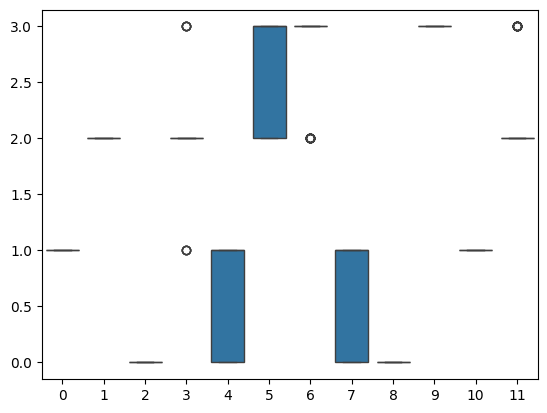

<Axes: >

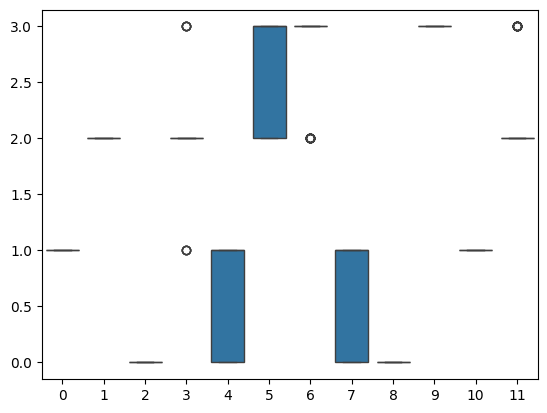

In [47]:
#TODO: plot the boxplot
sns.boxplot(x=kmeans.labels_, y=y, data=normalized_minmax)
plt.show()
sns.boxplot(x=kmeans.labels_, y=y, data=principal_breast_Df)


In [48]:

# calculate the silhouette score
silhouette_avg = silhouette_score(normalized_minmax, kmeans.labels_, metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

The average silhouette_score is : 0.07420082081283332


In [49]:
k_clusters_range = range(0, k_clusters)  # Start from 1 to 2, resulting in 2 to 3 clusters
fits = []
scores = []

for k in k_clusters_range:
    kmeans = KMeans(n_clusters=k+1, random_state=0, n_init=1).fit(normalized_minmax)
    fits.append(kmeans)
    labels = kmeans.labels_
    if len(set(labels)) > 1:  # Check if we have more than one cluster
        score = silhouette_score(normalized_minmax, labels, metric='euclidean')
        scores.append(score)
    else:
        scores.append(None)  # Or handle the case where there's only one cluster in some other way

# Printing scores to verify output
for idx, sc in enumerate(scores):
    print(f"Silhouette score for {idx+1} clusters: {sc}")
print(fits)


Silhouette score for 1 clusters: None
Silhouette score for 2 clusters: 0.2329661137625949
Silhouette score for 3 clusters: 0.11723422618166422
Silhouette score for 4 clusters: 0.09154181603978097
Silhouette score for 5 clusters: 0.0763527651321105
Silhouette score for 6 clusters: 0.08608479882450755
Silhouette score for 7 clusters: 0.0852790068358022
Silhouette score for 8 clusters: 0.08137498902887956
Silhouette score for 9 clusters: 0.08775351054320113
Silhouette score for 10 clusters: 0.08024921581405167
Silhouette score for 11 clusters: 0.07642572638006058
Silhouette score for 12 clusters: 0.07420082081283332
[KMeans(n_clusters=1, n_init=1, random_state=0), KMeans(n_clusters=2, n_init=1, random_state=0), KMeans(n_clusters=3, n_init=1, random_state=0), KMeans(n_clusters=4, n_init=1, random_state=0), KMeans(n_clusters=5, n_init=1, random_state=0), KMeans(n_clusters=6, n_init=1, random_state=0), KMeans(n_clusters=7, n_init=1, random_state=0), KMeans(n_init=1, random_state=0), KMeans(n

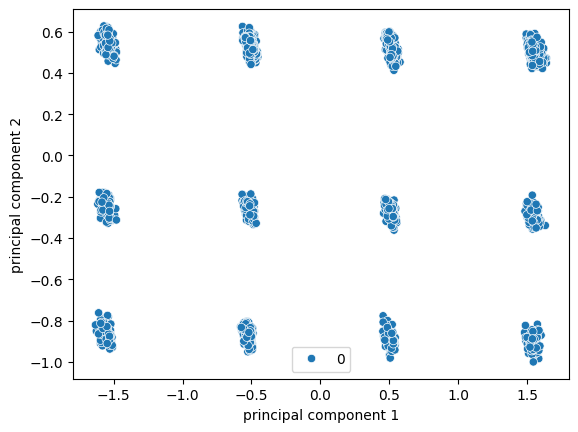

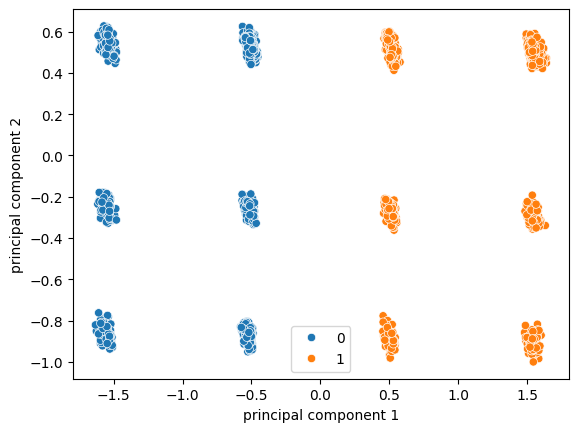

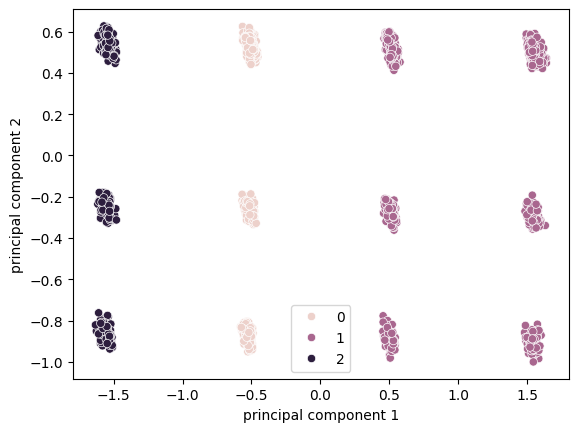

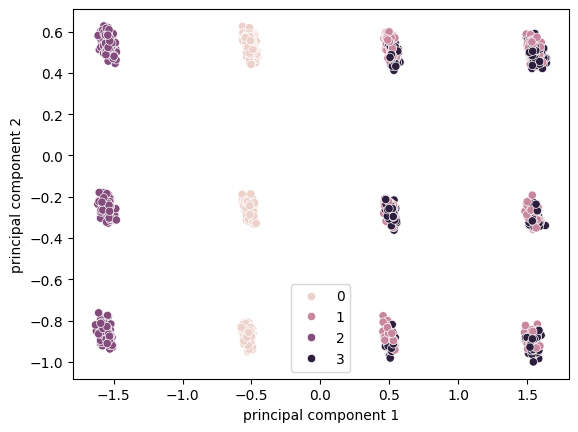

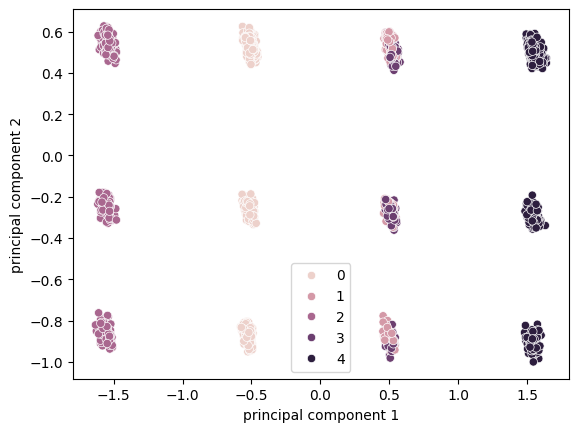

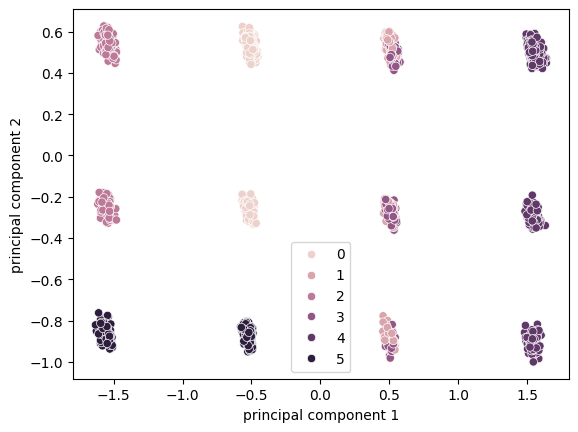

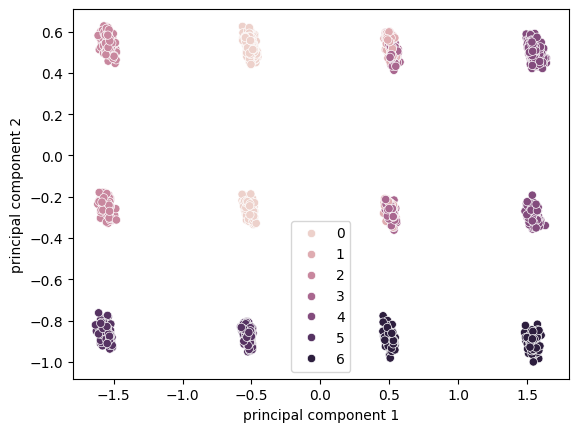

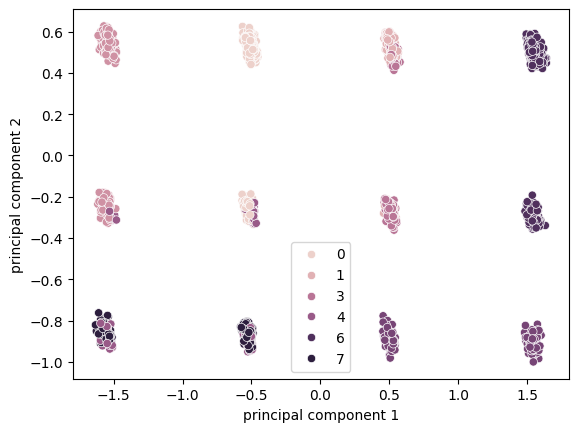

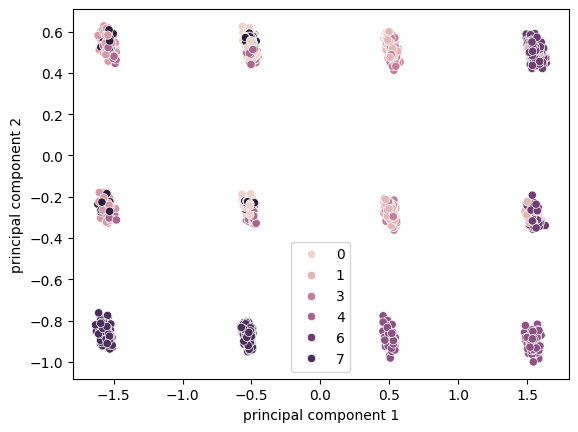

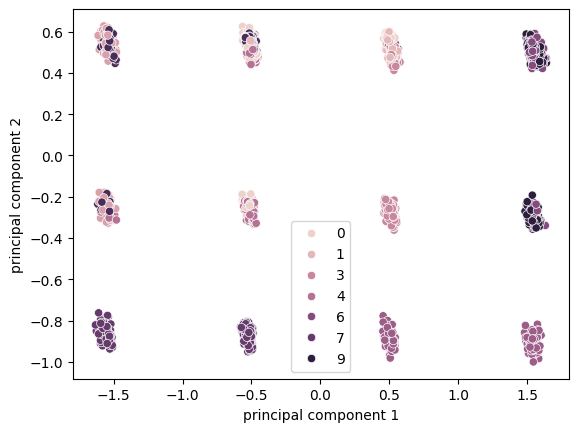

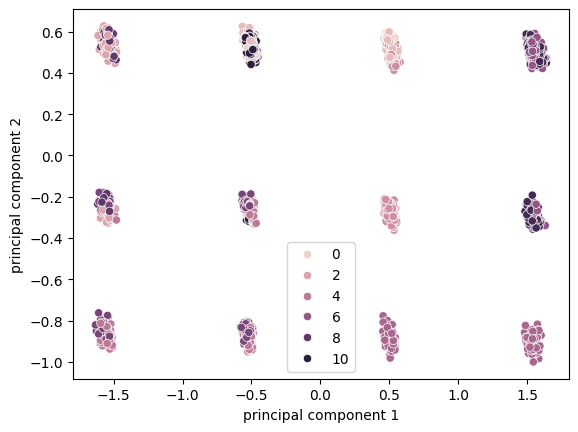

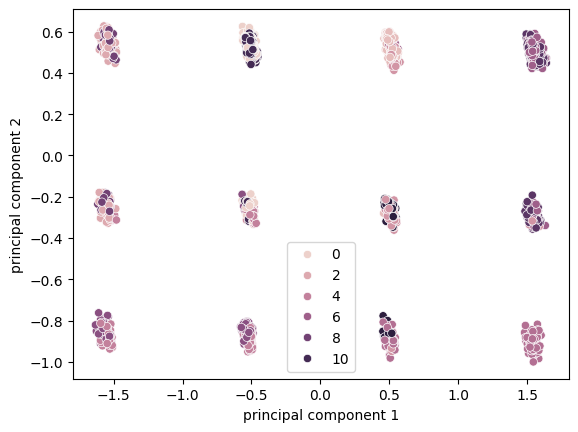

In [50]:
for i in range(0, k_clusters):
    # sns.scatterplot(data = normalized_minmax, x = 'battery_power', y = 'ram', hue = fits[i].labels_)
    sns.scatterplot(data = principal_breast_Df, x='principal component 1', y='principal component 2', hue = fits[i].labels_)
    plt.show()

<Axes: >

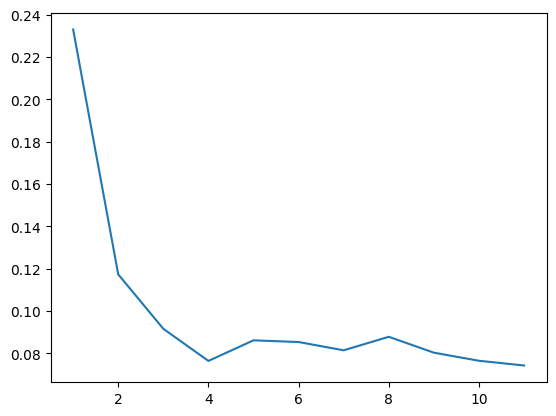

In [51]:
sns.lineplot(x = k_clusters_range, y = scores)

In [52]:
# os graficos sobre boxplot foram retirados devido a nossa base de dados ser para classificação e não para regressão

# for i in range (0, k_clusters):
#     sns.boxplot(x = fits[i].labels_, y = y)
#     plt.show()

In [53]:
###GNN - Training
# from sknetwork.gnn.gnn_classifier import GNNClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import numpy as np
# from sknetwork.gnn.gnn_classifier import GNNClassifier

# Supondo que df é o seu DataFrame com o conjunto de dados
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 
            'touch_screen', 'wifi']
target = 'price_range'

# Extraindo características e alvo
x = df[features].values
y = df[target].values

# Dividindo o conjunto de dados em treinamento e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Normalizando as características
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

#GMM - Gaussian Mixture Model - Training
from sklearn.mixture import GaussianMixture
import numpy as np

# Dividindo o conjunto de dados em treinamento e teste (70/30)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Normalizando as características
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)


# Treinando o modelo GMM
gmm = GaussianMixture(n_components=4, random_state=42, )
gmm.fit(X_train_minmax)

# Predizendo os clusters
train_clusters = gmm.predict(X_train_minmax)
test_clusters = gmm.predict(X_test_minmax)

# Avaliando o modelo
from sklearn.metrics import classification_report

print(classification_report(y_train, train_clusters))

# Avaliando o modelo

              precision    recall  f1-score   support

           0       0.26      0.12      0.16       349
           1       0.26      0.54      0.35       354
           2       0.27      0.13      0.17       352
           3       0.20      0.19      0.20       345

    accuracy                           0.25      1400
   macro avg       0.25      0.25      0.22      1400
weighted avg       0.25      0.25      0.22      1400



In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import warnings

# Carregar os dados
input_file = 'train.csv'
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
df = pd.read_csv(input_file)

# Separar recursos e alvo
x = df[features].values
y = df[target].values

# Normalização Z-score
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns=features)

# Configurar e treinar o modelo GMM
warnings.filterwarnings('ignore')
gm = GaussianMixture(n_components=4, random_state=42)
gm.fit(normalized_zscore)

# Previsão dos clusters
clusters = gm.predict(normalized_zscore)

# Exibir resultados
print(clusters)

#silhouete, homogeneidade e completude


[0 2 2 ... 3 1 1]


The similarity between: { 0 } the centroids and the problems objects is:  6.775632043494225
The similarity between: { 1 } the centroids and the problems objects is:  9.36443107789719
The similarity between: { 2 } the centroids and the problems objects is:  4.373266286785514
The similarity between: { 3 } the centroids and the problems objects is:  9.809224472338013
The similarity between: { 4 } the centroids and the problems objects is:  4.8342365360503345
The similarity between: { 5 } the centroids and the problems objects is:  11.198135860779065
The similarity between: { 6 } the centroids and the problems objects is:  15.795634723685454
The similarity between: { 7 } the centroids and the problems objects is:  3.6887896273445606
The similarity between: { 8 } the centroids and the problems objects is:  5.891288218468274
The similarity between: { 9 } the centroids and the problems objects is:  14.580593076971752
The similarity between: { 10 } the centroids and the problems objects is:  6

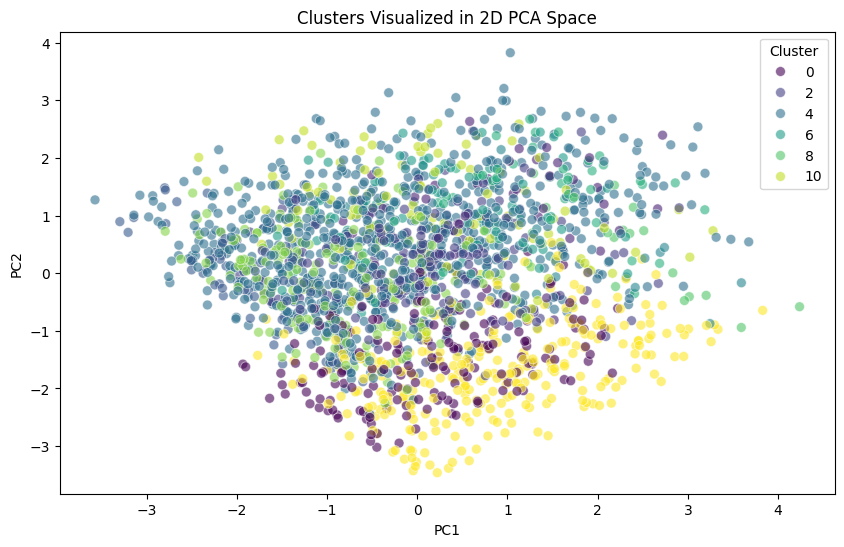

In [107]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, homogeneity_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
input_file = 'train.csv'
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'

df = pd.read_csv(input_file)

# Separate features and target
x = df[features].values
y = df[target].values

# Normalize the features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Initialize and fit the GMM
n_components = 12  # Adjust based on your needs
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(x_normalized)

# Predict cluster assignments
clusters = gmm.predict(x_normalized)


# Compute clustering metrics
silhouette_avg = silhouette_score(x_normalized, clusters)
#Similarity between the clusters
similarity = []
for i in range(n_components):
    similarity.append(centroids[i].dot(centroids[i]))

for i in range(n_components):
    print("The similarity between: {", i, "} the centroids and the problems objects is: ", similarity[i])

#Homogeneity
homogeneity = homogeneity_score(y, clusters)


from sklearn.decomposition import PCA

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_normalized)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=50, alpha=0.6)
plt.title('Clusters Visualized in 2D PCA Space')
plt.show()


Iteração 0: Log-Verossimilhança = -293.3821279077592
Iteração 1: Log-Verossimilhança = -282.0294815847904
Iteração 2: Log-Verossimilhança = -281.49345385254463
Iteração 3: Log-Verossimilhança = -281.23526879442113
Iteração 4: Log-Verossimilhança = -281.0402706451799
Iteração 5: Log-Verossimilhança = -280.86853365319297
Iteração 6: Log-Verossimilhança = -280.71104743741125
Iteração 7: Log-Verossimilhança = -280.5651477674333
Iteração 8: Log-Verossimilhança = -280.42999462916754
Iteração 9: Log-Verossimilhança = -280.3060232573958
Iteração 10: Log-Verossimilhança = -280.1945909098052
Iteração 11: Log-Verossimilhança = -280.0970501537351
Iteração 12: Log-Verossimilhança = -280.0138169333248
Iteração 13: Log-Verossimilhança = -279.9440864375726
Iteração 14: Log-Verossimilhança = -279.88618235204575
Iteração 15: Log-Verossimilhança = -279.8381050485652
Iteração 16: Log-Verossimilhança = -279.79794405987656
Iteração 17: Log-Verossimilhança = -279.7640735546912
Iteração 18: Log-Verossimilhanç

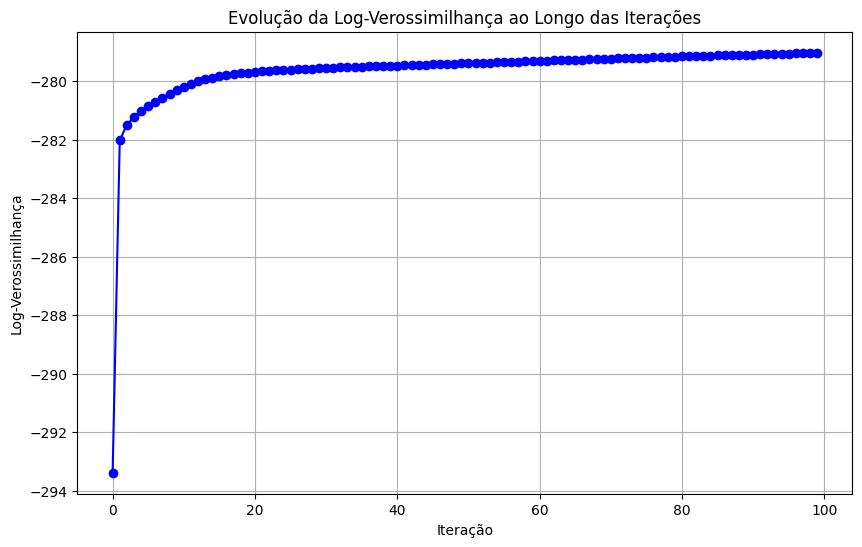

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.linalg import inv, det

# Defina a função para calcular a densidade gaussiana
def gaussian(X, mu, cov):
    D = X.shape[1]
    X_centered = X - mu
    cov_inv = inv(cov)
    det_cov = det(cov)
    
    # Computa a densidade gaussiana
    normalization_constant = np.sqrt((2 * np.pi) ** D * det_cov)
    exponent = -0.5 * np.sum(X_centered @ cov_inv * X_centered, axis=1)
    
    return np.exp(exponent) / normalization_constant

# Função para inicializar clusters
def initialize_clusters(X, n_clusters):
    clusters = []
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'pi_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

# Função para o passo de expectativa
def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
    
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)

# Função para o passo de maximização
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

# Função para obter a verossimilhança
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

# Inicialize clusters
n_clusters = 3
X = np.random.randn(100, 2)  # Dados de exemplo, substitua pelo seu conjunto de dados
clusters = initialize_clusters(X, n_clusters)

# Armazena a log-verossimilhança para cada iteração
log_likelihoods = []

# Execução do algoritmo EM
for iteration in range(100):  # Número de iterações
    expectation_step(X, clusters)
    maximization_step(X, clusters)
    likelihood, _ = get_likelihood(X, clusters)
    log_likelihoods.append(likelihood)
    print(f"Iteração {iteration}: Log-Verossimilhança = {likelihood}")

# Plotar o gráfico da log-verossimilhança
plt.figure(figsize=(10, 6))
plt.plot(range(len(log_likelihoods)), log_likelihoods, marker='o', linestyle='-', color='b')
plt.title('Evolução da Log-Verossimilhança ao Longo das Iterações')
plt.xlabel('Iteração')
plt.ylabel('Log-Verossimilhança')
plt.grid(True)
plt.show()




[0.08386288 0.08112475]
(2001, 22)
(2000, 2)
[1.]
[[ 1.11022302e-17 -1.13242749e-17]]


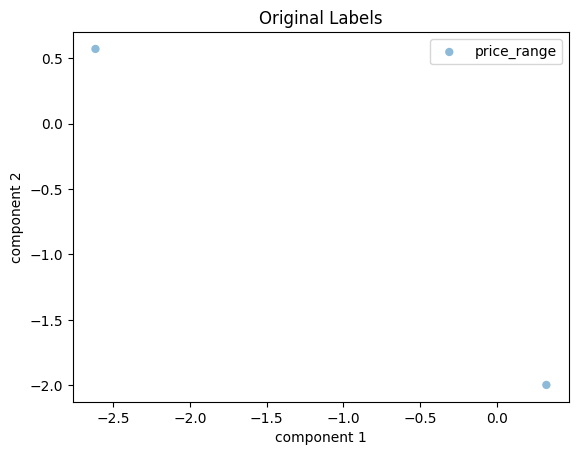

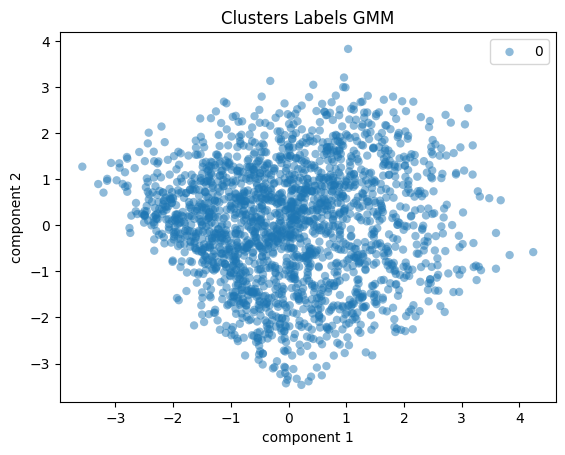

[0.36273699 0.63726301]
[[ 0.46563226 -1.21292209]
 [-0.26504292  0.69040836]]


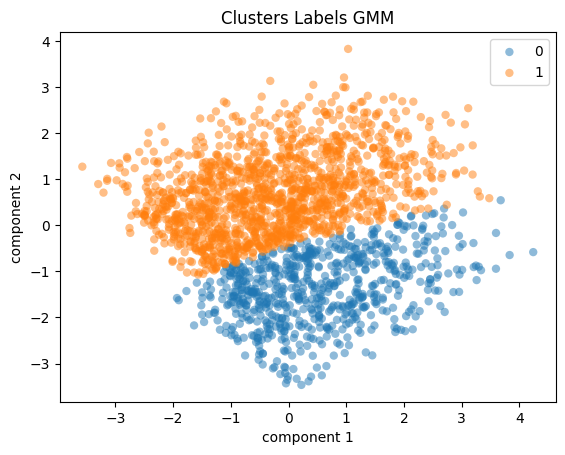

[0.27640075 0.40179381 0.32180544]
[[ 0.39676736 -1.47039482]
 [-1.01916457  0.22259678]
 [ 0.9317034   0.9850058 ]]


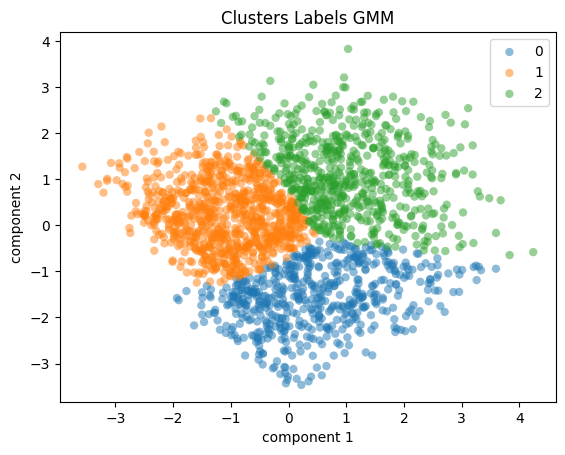

[0.29862201 0.16071412 0.24283041 0.29783346]
[[ 0.31100654  1.01441603]
 [ 1.82039329 -0.05170125]
 [-0.02392178 -1.46704765]
 [-1.27462967  0.20691414]]


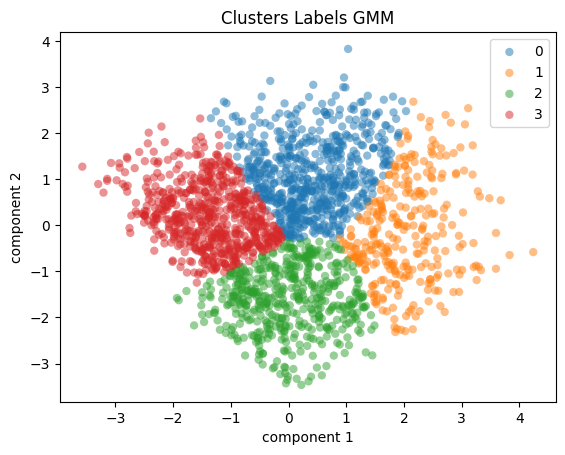

[0.13915859 0.21539694 0.27744196 0.16054073 0.20746178]
[[ 1.56644362 -0.96654232]
 [-0.38096921 -1.43077765]
 [-0.06727155  0.60739697]
 [ 1.29960667  1.4204216 ]
 [-1.57089337  0.22237765]]


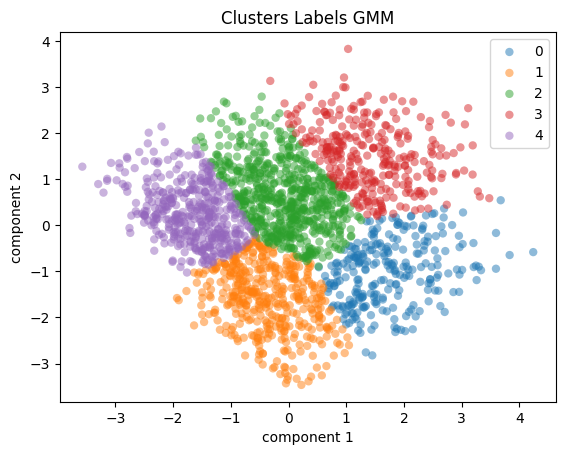

[0.16922618 0.13114557 0.14058553 0.20649492 0.15109554 0.20145226]
[[-0.43128297 -1.61624103]
 [ 1.56175834  1.14441564]
 [ 1.44950358 -1.16279109]
 [-1.56063826  0.23717018]
 [-0.1624837   1.42270092]
 [ 0.05560568  0.11396577]]


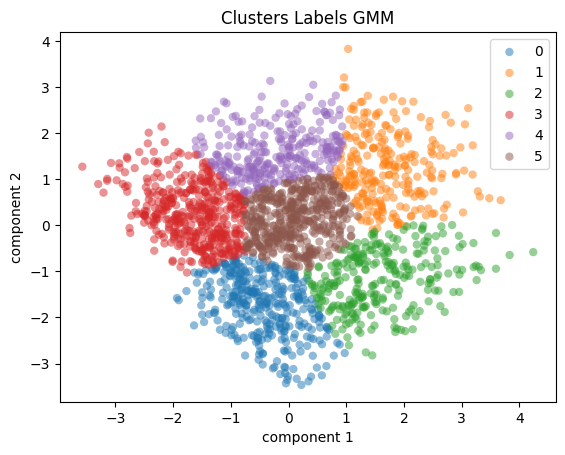

[0.17308793 0.19844838 0.12787832 0.12179079 0.15455398 0.08744768
 0.13679292]
[[-1.6362737  -0.00333476]
 [ 0.07809791  0.08966522]
 [ 1.41982486 -1.24241846]
 [ 0.78822917  1.58964061]
 [-0.37919192 -1.70695885]
 [ 1.87108659  0.71538623]
 [-0.83966038  1.09155145]]


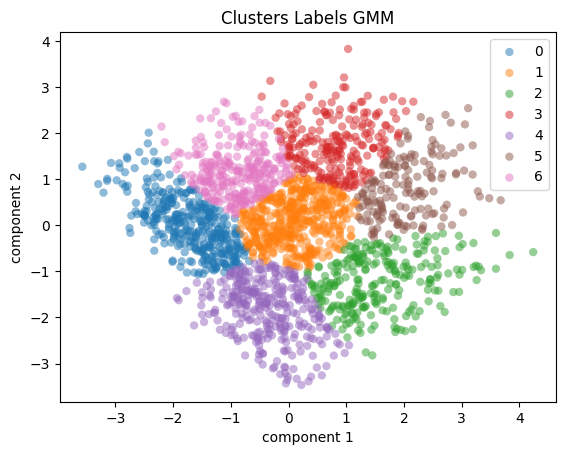

[0.11215813 0.13591645 0.10696282 0.17355555 0.12525896 0.12611827
 0.08832521 0.13170461]
[[ 1.63509898 -1.01657026]
 [-0.9242818  -0.78089026]
 [ 0.68319766  1.71025833]
 [ 0.23201027  0.19055408]
 [-1.89253389  0.29731137]
 [ 0.10979045 -1.91537451]
 [ 1.81037722  0.87379966]
 [-0.81849571  0.99685905]]


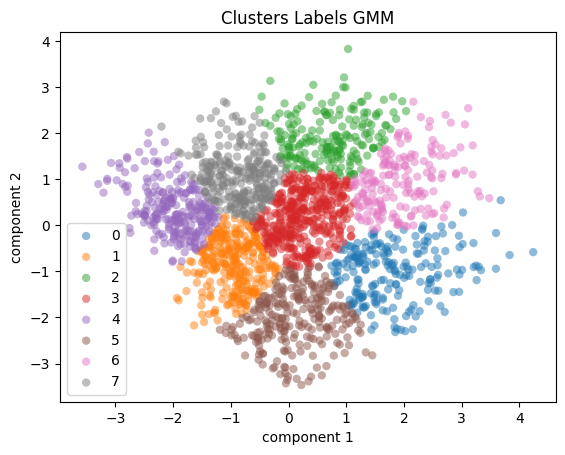

[0.06950005 0.14454193 0.10536999 0.12972721 0.14391    0.11797405
 0.10511325 0.10601021 0.07785333]
[[ 1.98699596  1.23049238]
 [-1.77494101  0.14782001]
 [ 0.86232287 -0.03949247]
 [-0.76854865 -1.13067497]
 [-0.17539202  0.22440658]
 [ 0.60416839  1.50598608]
 [-0.9854134   1.19010627]
 [ 0.32239223 -1.95829565]
 [ 1.93522134 -1.07256914]]


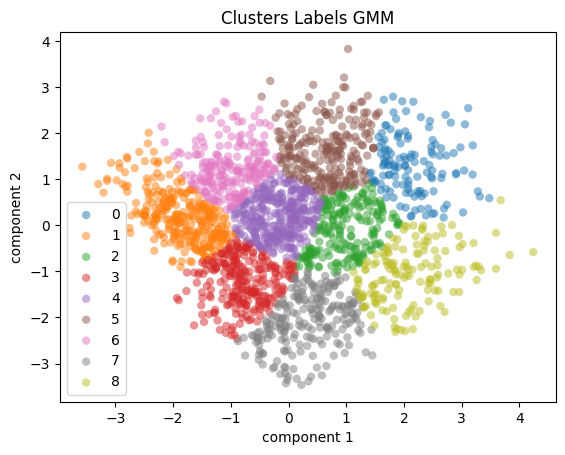

[0.08037833 0.12732176 0.07107162 0.1019053  0.09481863 0.09398424
 0.10920741 0.08567656 0.12075553 0.11488062]
[[ 0.90540586 -1.70776388]
 [-0.82981185  0.99815391]
 [ 1.94291349  1.2380634 ]
 [-1.21473195 -0.43046721]
 [-2.03016739  0.45057346]
 [ 1.76968684 -0.59598872]
 [-0.0667933  -0.35681725]
 [ 0.58458974  1.86344969]
 [ 0.50999836  0.60203098]
 [-0.51898833 -1.86313792]]


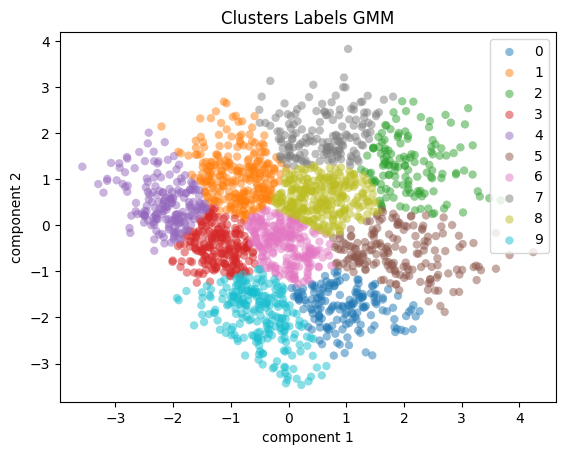

[0.0933082  0.06286865 0.07940191 0.10415376 0.06629856 0.08242775
 0.06897674 0.11571103 0.11472834 0.10550667 0.10661838]
[[-1.12079078 -0.57336421]
 [ 1.99303013  1.33103285]
 [ 0.46931805 -0.83369929]
 [ 0.67679504  0.66749424]
 [ 1.03666952 -1.82084004]
 [ 0.61638267  1.85942084]
 [ 2.0630932  -0.58223584]
 [-1.91153483  0.37757596]
 [-0.20652358  0.08685464]
 [-0.48687652 -1.93229617]
 [-0.88229921  1.16604947]]


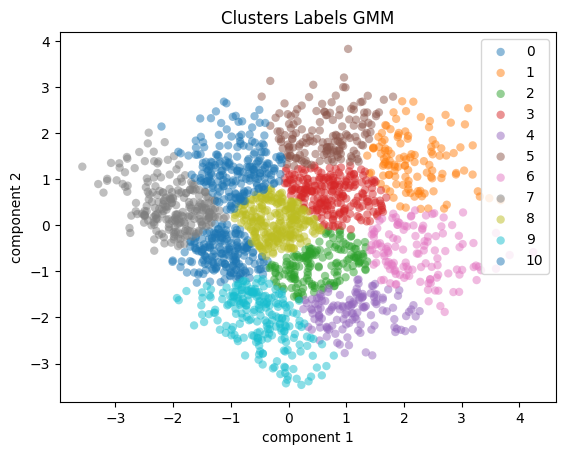

[0.08375346 0.07080537 0.09422602 0.06147975 0.09601965 0.105803
 0.10508636 0.06815147 0.05461778 0.07269804 0.09788223 0.08947686]
[[ 1.86898734 -0.64598993]
 [-0.23239235  1.61110616]
 [-1.0515166  -0.61568541]
 [ 1.04417673  1.93843895]
 [ 0.14675268 -0.48178387]
 [-0.44486499 -1.95908399]
 [-1.92824772  0.21251421]
 [-1.29866273  1.05193478]
 [ 2.14051031  1.17332645]
 [ 0.9283435  -1.74553987]
 [-0.34352913  0.41404672]
 [ 0.76161475  0.67802144]]


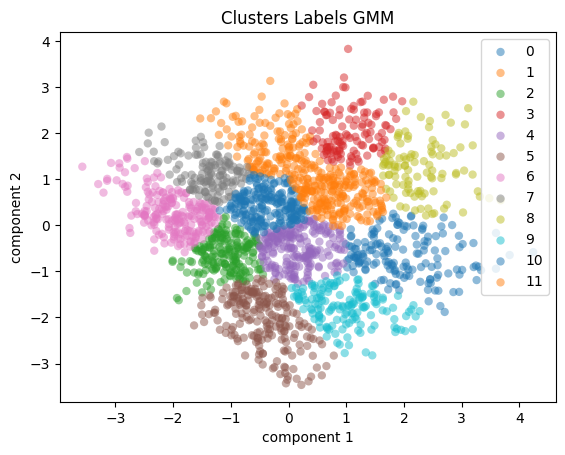

In [114]:
#Implementation of Kmeans from scratch and using sklearn
#Loading the required modules 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import pandas as pd

def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()

def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

target = 'price_range'

digits = pd.read_csv(input_file, names=columns)


x = digits.loc[:, features].values
y = digits.loc[:,[target]].values

#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(x_zscore)
print(pca.explained_variance_ratio_)
print(digits.shape)
print(projected.shape)    
plot_samples(projected, target, 'Original Labels') 

for i in range(1, n_components+1):
    #Applying sklearn GMM function
    gm  = GaussianMixture(i).fit(projected)
    print(gm.weights_)
    print(gm.means_)
    x = gm.predict(projected)

    #Visualize the results sklearn
    plot_samples(projected, x, 'Clusters Labels GMM')

    plt.show()